# Project: Investigate a Dataset - FBI Gun Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Dataset Description
I choose the "FBI Gun Data" (original source on <a href="https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md">Github</a>). The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives.
Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.
The data has been supplemented with state level data from <a href="https://www.census.gov/"> census.gov</a>.
* The NICS data contains the number of firearm checks by month, state, and type.
* The U.S. census data contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

Each column represents the type of transaction submitted to the National Instant Criminal Background Check System (NICS). In addition, each type of transaction is broken down by the type of firearm—handgun, long gun, and other. The types of firearms are defined by the Bureau of Alcohol, Tobacco, Firearms and Explosives as follows:

  <mark>Disclaimer: This description is a direct quotation from <a href="https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view"> FBI records </a> associated with NICS, and is presented without alteration </mark>


* Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.

* Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore
either a number of ball shot or a single projectile for each single pull of the trigger.

* Other—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.

The transaction types indicated in yellow on the chart are for background checks initiated by an officially-licensed Federal Firearms Licensee (FFL) or criminal justice/law enforcement agency prior to the issuance of a firearm-related permit or transfer. The indication of “multiple” denotes a background check where more than one type of firearm is associated to a
single background check and “admin” denotes the administrative checks that are for other authorized uses of the NICS.

Other types of transactions are explained below:
* Pre-Pawn—background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.

* Redemption—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.

* Returned/Disposition—background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.

* Rentals—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.

* Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

* Return to Seller-Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL


<mark>The NICS dataset includes 27 features. The explanation for each feature is as follows:</mark>
| **Feature**                  | **Explanation** |
|------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `month`                      | The month (and year) when the background check was conducted. |
| `state`                      | The U.S. state where the background check was initiated. |
| `permit`                     | Transactions for background checks initiated by an FFL or law enforcement agency before issuing a firearm-related permit or transfer. |
| `permit_recheck`             | Follow-up or recheck transactions for permits. |
| `handgun`                    | The count of transactions involving handguns: firearms designed to be held and fired with one hand. |
| `long_gun`                   | The count of transactions involving long guns: firearms designed for shoulder firing using fixed cartridges or shotgun shells. |
| `other`                      | Transactions for firearm types that are neither handguns nor long guns. |
| `multiple`                   | Indicates background checks where more than one type of firearm is associated with a single transaction. |
| `admin`                      | Administrative background checks that serve other authorized uses of the NICS system. |
| `prepawn_handgun`            | Background checks for prospective firearm transferees looking to pledge or pawn a handgun as security for a loan before actually pawning the firearm. |
| `prepawn_long_gun`           | The long gun version of the pre-pawn transaction. |
| `prepawn_other`              | Pre-pawn checks for firearm types classified as “other.” |
| `redemption_handgun`         | Background checks for transferees attempting to regain possession of a handgun after having pawned it. |
| `redemption_long_gun`        | Redemption checks for long guns. |
| `redemption_other`           | Redemption transactions for firearms categorized as “other.” |
| `returned_handgun`           | Background checks requested by law enforcement prior to returning a handgun to the transferee. |
| `returned_long_gun`          | The long gun counterpart for returned/disposition transactions. |
| `returned_other`             | Returned/disposition checks for other firearm types. |
| `rentals_handgun`            | Transactions for background checks when a handgun is rented or loaned for use off the premises of an FFL’s business. |
| `rentals_long_gun`           | Similar to rentals_handgun, but for long guns. |
| `private_sale_handgun`       | Background checks for handguns involved in private sales—transactions where the seller is not an FFL. |
| `private_sale_long_gun`      | The private sale equivalent for long guns. |
| `private_sale_other`         | Private sale transactions for firearms in the “other” category. |
| `return_to_seller_handgun`   | Background checks for cases where a handgun from a private sale is returned to the seller before the final transfer. |
| `return_to_seller_long_gun`  | The long gun version of return-to-seller transactions. |
| `return_to_seller_other`     | For firearms categorized as “other” in private sale returns. |
| `totals`                     | The sum of all background check transactions (across all types and firearm categories) for a given month and state. |

<mark>The U.S. Census Dataset includes 52 features. The explanation for each feature is as follows:</mark>

| **Feature**     | **Explanation**                                                                                                                                                     |
|-----------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `Fact`          | Demographic and socioeconomic data for 2010-2016, including:<br>- Population estimates<br>- Poverty rates<br>- 50+ other demographic indicators                     |
| `Fact Note`     | Further explanation about a specific `Fact`.                                                                                                                       |
| `50 other features` | All 50 U.S. states (e.g., Alabama, Alaska, etc.).                                                                                                               |


### Question(s) for Analysis

The purpose of this analysis is that what factors are important for us to Answer these 3 questions.

__1. Do poorer states have higher gun background check rates per capita?__

__2. Is there seasonal variation in gun background checks?__

__3. Which states show the most volatile gun check patterns?__

Dependent Variables :
* Gun background check rates per capita (This can be derived from the totals column in the NICS dataset divided by the population in the Census dataset.)
* Gun background check counts (totals) over time
* Variation in gun background check counts (totals) across months and years

Independent Variables :
* Median household income (in 2015 dollars), 2011-2015)
* Per capita income in past 12 months (in 2015 dollars), 2011-2015
* Persons in poverty, percent
* month
* Possible seasonal influences (e.g., December for holiday purchases, election years, hunting season, etc.)
* state
* Economic factors (e.g., unemployment, income, poverty) that might correlate with fluctuations in gun purchases







In [25]:
 #import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
 In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### Load Datasets

In [26]:
# NICS dataset contains monthly gun background check statistics by state
# Census dataset contains demographic and economic indicators by state
nics_data = pd.read_excel('data/gun-data.xlsx')
census_data = pd.read_csv('data/u.s.-census-data.csv')

# Quick verify of the dataset
print("NICS Data Shape:", nics_data.shape)
print("Census Data Shape:", census_data.shape)
nics_data.head()

NICS Data Shape: (12485, 27)
Census Data Shape: (85, 52)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [27]:
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


__Check the type of each element and the number of elements__


In [28]:
nics_data.info()
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

### Data Cleaning

checking for missing values

In [29]:
# Checking for missing values
print("NICS Missing Values:", nics_data.isnull().sum().sum())
print("Census Missing Values:", census_data.isnull().sum().sum())

# Since 'total' is a critical feature, I will drop null-total rows
nics = nics_data.dropna(subset=['totals'])

# Verify remaining nulls
print(nics['totals'].isnull().sum().sum())


NICS Missing Values: 154595
Census Missing Values: 1062
0


handling duplicates

In [30]:
# checking if datasets have duplicates
print(f"Initial NICS duplicates: {nics_data.duplicated().sum()}")
print(f"Initial Census duplicates: {census_data.duplicated().sum()}")

# Drop duplicates on both datasets for better results
nics_data.drop_duplicates(inplace=True)
census_data.drop_duplicates(inplace=True)

Initial NICS duplicates: 0
Initial Census duplicates: 3


handling date/time data

In [31]:
# Convert month to datetime for time-based analysis
if 'month' in nics_data.columns:
    nics_data['month'] = pd.to_datetime(nics_data['month'])
    nics_data['year'] = nics_data['month'].dt.year
    nics_data['month_name'] = nics_data['month'].dt.month_name()

    # identify/fix invalid dates
print(f"Invalid dates: {nics_data['month'].isna().sum()}")
if nics_data['month'].isna().sum(): nics_data = nics.dropna(subset=['month'])  # remove rows with invalid dates


Invalid dates: 0


There is no invalid dates

handling negative data (in total)

In [32]:
# Check for negative totals
negative_totals = nics_data[nics_data['totals'] < 0]
print(f"Negative totals found: {len(negative_totals)}")
nics_data['totals'] = nics_data['totals'].clip(lower=0)  # Replace negatives with 0


Negative totals found: 0


transposing Fact feature in census data since it is the primary factor in the analysis

In [33]:
# Transform census data from wide to long format
census_data_transposed = census_data.set_index('Fact').T

# Extract and clean relevant economic indicators
income_cols = [
    'Median household income (in 2015 dollars), 2011-2015',
    'Per capita income in past 12 months (in 2015 dollars), 2011-2015'
]
population_col = 'Population estimates, July 1, 2016,  (V2016)'

for col in income_cols + [population_col]:
    if col in census_data_transposed.columns:
        census_data_transposed[col] = pd.to_numeric(
            census_data_transposed[col].str.replace(',', ''),
            errors='coerce'
        )

state_data = census_data_transposed[income_cols + [population_col]].copy()
state_data.index.name = 'state'
state_data = state_data.reset_index()

<a id='eda'></a>
## Exploratory Data Analysis
### Question 1 -  Do poorer states have higher gun background check rates per capita?

Prepare data for analysis


In [34]:
state_checks = nics_data.groupby('state')['totals'].sum().reset_index()
state_analysis = pd.merge(state_checks, state_data, on='state', how='inner')
state_analysis['checks_per_capita'] = state_analysis['totals'] / state_analysis[population_col]


 After merging, handle missing values

In [35]:
print("Missing values before cleaning:")
print(state_analysis[['state', 'Median household income (in 2015 dollars), 2011-2015', population_col]].isna().sum())

Missing values before cleaning:
state                                                    0
Median household income (in 2015 dollars), 2011-2015    38
Population estimates, July 1, 2016,  (V2016)             0
dtype: int64


 1D Exploration: Distribution of checks per capita


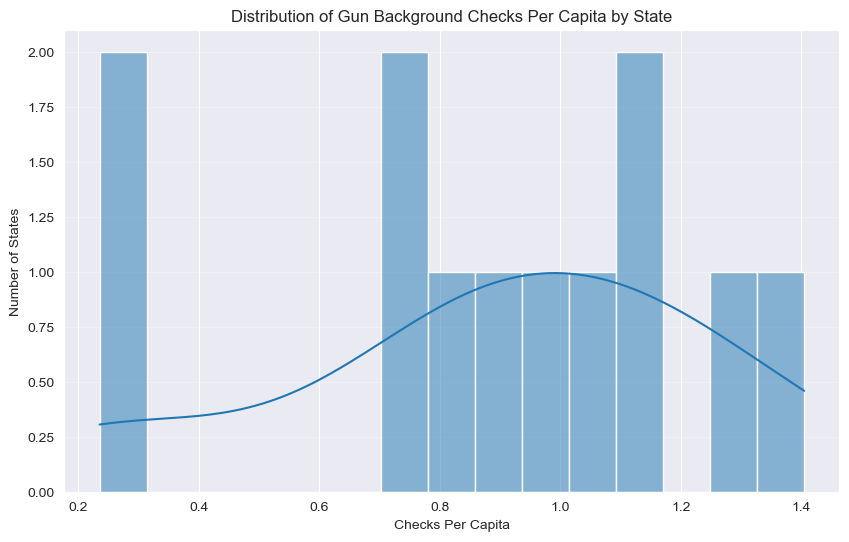

In [52]:
plt.figure(figsize=(10, 6))
# Create a histogram with a Kernel Density Estimate (KDE) overlay
# 'state_analysis['checks_per_capita']': The data to plot (gun background checks per capita by state)
# 'kde=True': Adds a smooth KDE curve to the histogram
# 'bins=15': Divides the data into 15 bins for the histogram

sns.histplot(state_analysis['checks_per_capita'], kde=True, bins=15)
plt.title('Distribution of Gun Background Checks Per Capita by State')
plt.xlabel('Checks Per Capita')
plt.ylabel('Number of States')
plt.grid(axis='y', alpha=0.3)
plt.savefig('checks_per_capita_distribution.png')
plt.show()
plt.close()

Plot shows most states have moderate background check rates, but a small subset exhibits unusually high activity, likely due to unique regional factors (e.g., cultural norms, state policies).



Drop rows with missing values

In [37]:
state_analysis = state_analysis.dropna(subset=[
    'Median household income (in 2015 dollars), 2011-2015',
    population_col
])
print("\nMissing values after cleaning:")
print(state_analysis[['state', 'Median household income (in 2015 dollars), 2011-2015', population_col]].isna().sum())


Missing values after cleaning:
state                                                   0
Median household income (in 2015 dollars), 2011-2015    0
Population estimates, July 1, 2016,  (V2016)            0
dtype: int64


function 'analyze_income_vs_checks' for analyzing the relations in question 1

In [38]:
def analyze_income_vs_checks():

     # Create a figure with two subplots, sized 12×10 inches
    plt.figure(figsize=(12, 10))

    # First subplot: Median household income vs. background checks
    plt.subplot(2, 1, 1)
    sns.scatterplot(
        x=state_analysis['Median household income (in 2015 dollars), 2011-2015'],
        y=state_analysis['checks_per_capita']
    )
    plt.title('Median Household Income vs. Background Checks Per Capita')
    plt.xlabel('Median Household Income (2015 dollars)')
    plt.ylabel('Background Checks Per Capita')

     # Calculate Pearson correlation and p-value for median household income

    median_corr, median_p = stats.pearsonr(
        state_analysis['Median household income (in 2015 dollars), 2011-2015'],
        state_analysis['checks_per_capita']
    )

    # Add correlation information to the plot
    plt.annotate(f'Correlation: {median_corr:.3f} (p={median_p:.3f})',
                 xy=(0.05, 0.95), xycoords='axes fraction')

    # Second subplot: Per capita income vs. background checks
    plt.subplot(2, 1, 2)
    sns.scatterplot(
        x=state_analysis['Per capita income in past 12 months (in 2015 dollars), 2011-2015'],
        y=state_analysis['checks_per_capita']
    )
    plt.title('Per Capita Income vs. Background Checks Per Capita')
    plt.xlabel('Per Capita Income (2015 dollars)')
    plt.ylabel('Background Checks Per Capita')

    # Calculate Pearson correlation and p-value for per capita income
    percap_corr, percap_p = stats.pearsonr(
        state_analysis['Per capita income in past 12 months (in 2015 dollars), 2011-2015'],
        state_analysis['checks_per_capita']
    )

   # Add correlation information to the plot
    plt.annotate(f'Correlation: {percap_corr:.3f} (p={percap_p:.3f})',
                 xy=(0.05, 0.95), xycoords='axes fraction')

    plt.tight_layout()                 # Optimize spacing between subplots
    plt.savefig('income_vs_checks.png')         # Save the figure to a file
    plt.show()      # Display the figure
    plt.close()    # Close the figure to free memory

    return {
        'median_income_correlation': median_corr,
        'median_income_p_value': median_p,
        'per_capita_income_correlation': percap_corr,
        'per_capita_income_p_value': percap_p
    }

Checking results for question 1

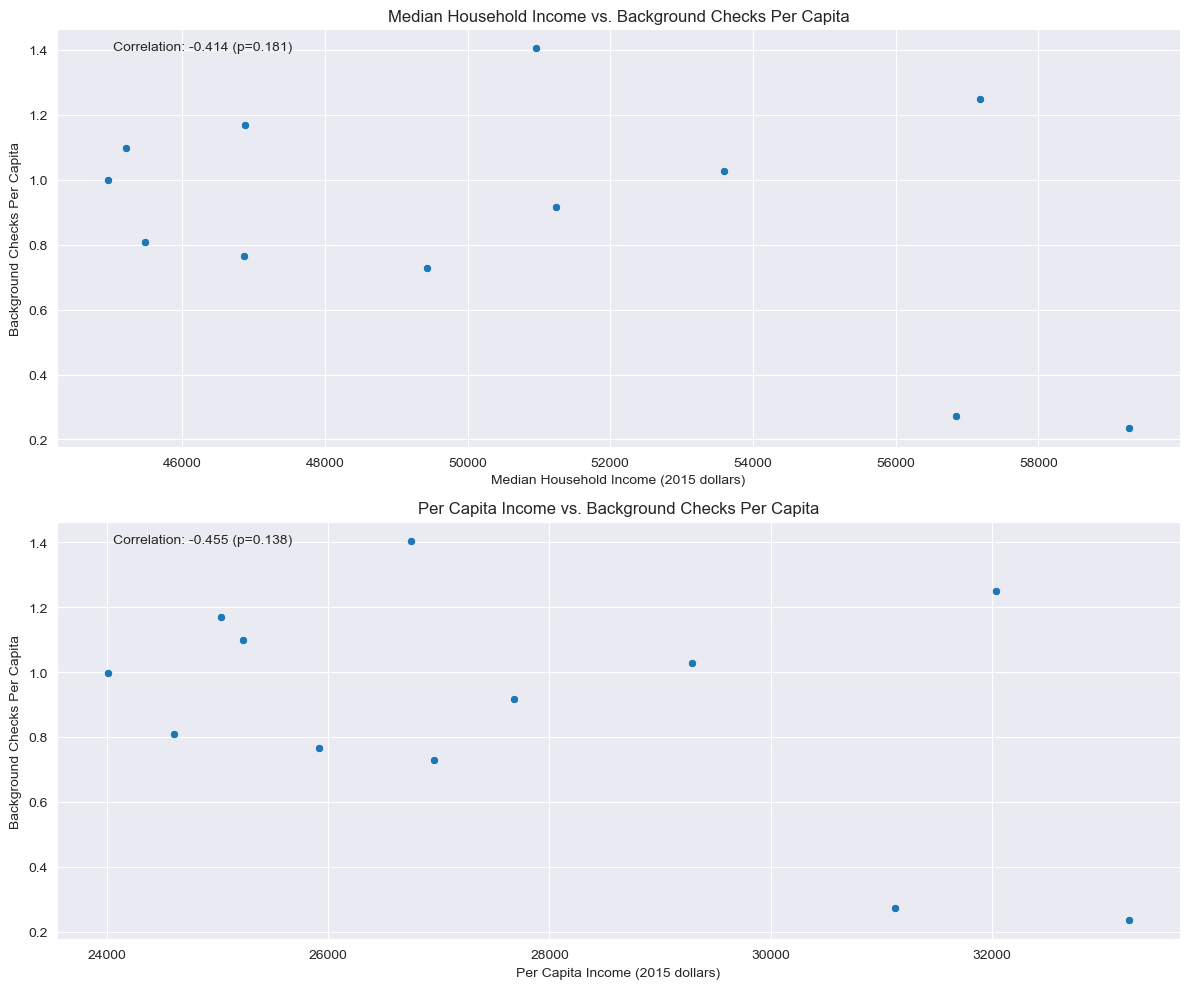

Income vs. Background Check Analysis:
{'median_income_correlation': np.float64(-0.41415124892477667), 'median_income_p_value': np.float64(0.18074522568848536), 'per_capita_income_correlation': np.float64(-0.4546963142230094), 'per_capita_income_p_value': np.float64(0.13751086566363732)}

Top 5 states by background checks per capita:
           state  checks_per_capita  \
40  South Dakota           1.404710   
33  North Dakota           1.250000   
35      Oklahoma           1.168442   
41     Tennessee           1.099245   
37  Pennsylvania           1.027350   

    Median household income (in 2015 dollars), 2011-2015  
40                                            50957.0     
33                                            57181.0     
35                                            46879.0     
41                                            45219.0     
37                                            53599.0     

Bottom 5 states by background checks per capita:
             state  checks

In [39]:
income_check_results = analyze_income_vs_checks()
print("Income vs. Background Check Analysis:")
print(income_check_results)

top_checks_states = state_analysis.sort_values('checks_per_capita', ascending=False).head(5)
bottom_checks_states = state_analysis.sort_values('checks_per_capita').head(5)

print("\nTop 5 states by background checks per capita:")
print(top_checks_states[['state', 'checks_per_capita', 'Median household income (in 2015 dollars), 2011-2015']])

print("\nBottom 5 states by background checks per capita:")
print(bottom_checks_states[['state', 'checks_per_capita', 'Median household income (in 2015 dollars), 2011-2015']])

Plot shows that while poorer states generally have higher background check rates, other factors (e.g. population density, gun culture) likely play a significant role. states with lower incomes tend to have higher background check rates per capita, as evidenced by the downward-sloping trend lines, and also there are some outliers like North Dakota.

### Question 2 - Is there seasonal variation in gun background checks?

Preparing the data for the function 'analyze_seasonal_variation'

In [40]:
monthly_checks = nics_data.groupby(['month_name', nics_data['month'].dt.month])['totals'].sum().reset_index()
monthly_checks = monthly_checks.sort_values('month')

the analyze_seasonal_variation function implementation

In [41]:
def analyze_seasonal_variation():
    plt.figure(figsize=(12, 6))

    # Create a bar plot showing monthly totals with months in chronological order
    # Uses the 'monthly_checks' which contains 'month_name' and 'totals' columns
    sns.barplot(x='month_name', y='totals', data=monthly_checks, order=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
    plt.title('Seasonal Variation in Gun Background Checks')
    plt.xlabel('Month')
    plt.ylabel('Total Background Checks')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('seasonal_variation.png')
    plt.show()
    plt.close()

    # Calculate the percentage change between consecutive months
    monthly_checks['pct_change'] = monthly_checks['totals'].pct_change() * 100
    # Identify the month with the highest number of background checks
    peak_month = monthly_checks.loc[monthly_checks['totals'].idxmax()]
   # the lowest number of background checks
    low_month = monthly_checks.loc[monthly_checks['totals'].idxmin()]
    # Calculate the coefficient of variation (standard deviation / mean)
    # this measures the relative dispersion of data points around the mean
    cv = monthly_checks['totals'].std() / monthly_checks['totals'].mean()

    return {
        'peak_month': peak_month['month_name'],
        'peak_month_checks': peak_month['totals'],
        'lowest_month': low_month['month_name'],
        'lowest_month_checks': low_month['totals'],
        'max_to_min_ratio': peak_month['totals'] / low_month['totals'],
        'coefficient_of_variation': cv
    }

checking results

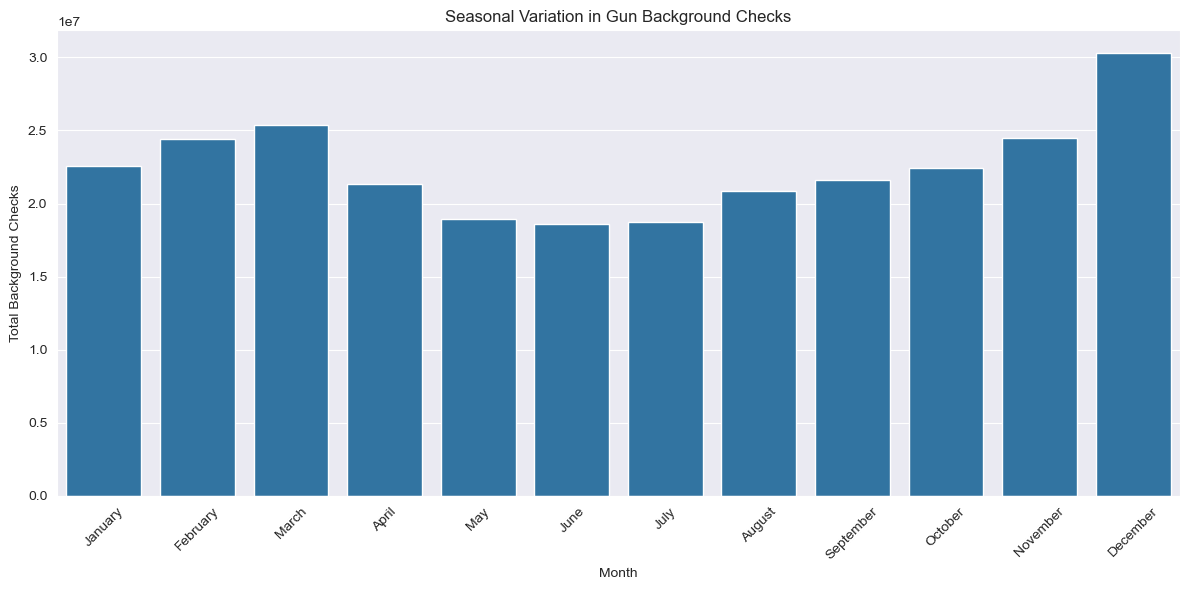


Seasonal Variation Analysis:
{'peak_month': 'December', 'peak_month_checks': np.int64(30321770), 'lowest_month': 'June', 'lowest_month_checks': np.int64(18567565), 'max_to_min_ratio': np.float64(1.6330504296066823), 'coefficient_of_variation': np.float64(0.14954891029571302)}


In [42]:
seasonal_results = analyze_seasonal_variation()
print("\nSeasonal Variation Analysis:")
print(seasonal_results)

Plot showing peek checks in December

### Question 3 - Which states show the most volatile gun check patterns?

preparing data to use it in the function 'analyze_state_volatility', ranking state's volatility based on NICS dataset by totals relating to each state

In [43]:
# this creates a dataframe showing monthly check totals for each state
state_monthly_checks = nics_data.groupby(['state', 'month_name', nics_data['month'].dt.month])['totals'].sum().reset_index()
state_monthly_checks = state_monthly_checks.sort_values(['state', 'month'])
# Sort the dataframe by state and numerical month value
state_volatility = state_monthly_checks.groupby('state')['totals'].agg([
    ('mean', 'mean'),
    ('std', 'std'),
    ('cv', lambda x: x.std() / x.mean()),
    ('max', 'max'),
    ('min', 'min'),
    ('range', lambda x: x.max() - x.min()),
    ('max_min_ratio', lambda x: x.max() / x.min())
]).reset_index()


In [44]:
def analyze_state_volatility():
 # Get the 10 states with the highest coefficient of variation (most volatile)
    most_volatile_states = state_volatility.sort_values('cv', ascending=False).head(10)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='state', y='cv', data=most_volatile_states)
    plt.title('Top 10 States by Check Volatility (Coefficient of Variation)')
    plt.xlabel('State')
    plt.ylabel('Coefficient of Variation')
    plt.xticks(rotation=45)
    plt.tight_layout() # Adjust layout to prevent label cutoff
    plt.savefig('state_volatility.png')
    plt.show()
    plt.close()

 # Extract the top 5 most volatile states for detailed analysis
    top5_volatile = most_volatile_states.head(5)['state'].tolist()
 # Filter the monthly data to only include these 5 states
    top5_data = state_monthly_checks[state_monthly_checks['state'].isin(top5_volatile)]

   # Create a line plot showing monthly patterns for the top 5 most volatile states
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='month', y='totals', hue='state', data=top5_data) # Create line plot with state colors
    plt.title('Monthly Background Check Patterns for Most Volatile States')
    plt.xlabel('Month')
    plt.ylabel('Total Background Checks')
    plt.xticks(range(1, 13), [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    plt.tight_layout()
    plt.savefig('volatile_states_patterns.png')
    plt.show()
    plt.close()

    return most_volatile_states[['state', 'mean', 'std', 'cv', 'max_min_ratio']].head(10)


checking results


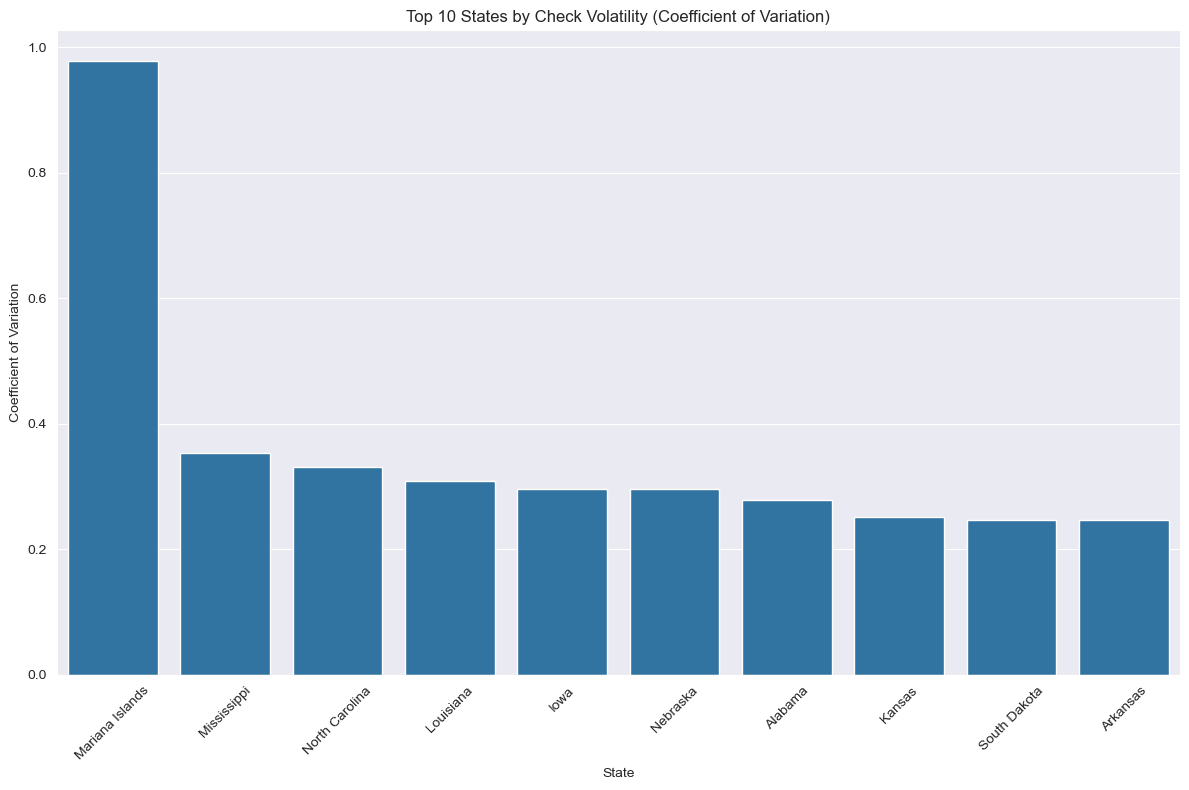

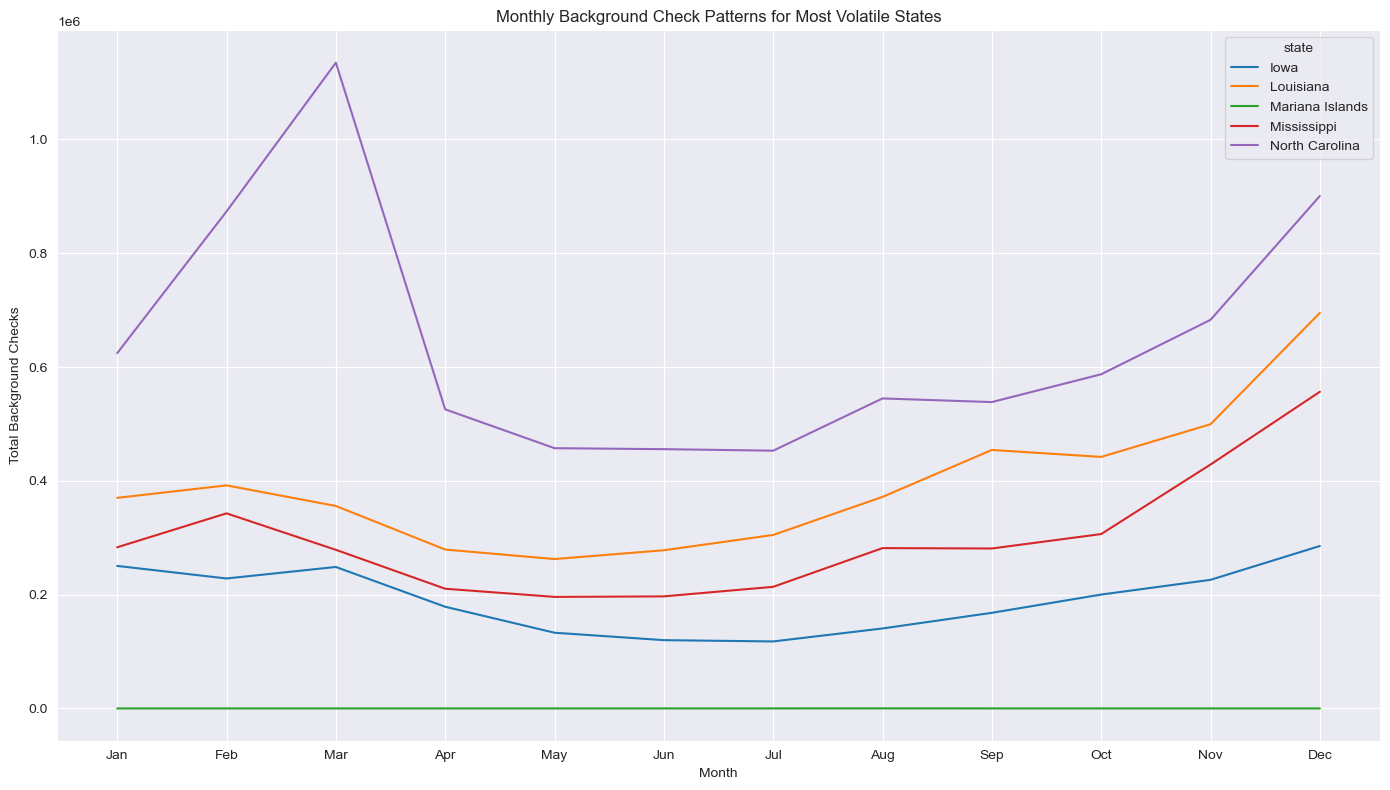


Most Volatile States Analysis:
              state           mean            std        cv  max_min_ratio
21  Mariana Islands      38.500000      37.635815  0.977554      11.071429
26      Mississippi  298026.000000  105537.028739  0.354120       2.838564
35   North Carolina  648140.750000  214479.415328  0.330915       2.505152
19        Louisiana  392088.083333  121381.226925  0.309576       2.647764
16             Iowa  191429.666667   56784.286193  0.296633       2.424392
29         Nebraska   94684.083333   28085.831224  0.296627       2.574107
0           Alabama  558839.916667  155747.545728  0.278698       2.371297
17           Kansas  218722.416667   55089.781254  0.251871       2.234827
44     South Dakota  101309.333333   25046.468919  0.247228       2.073851
3          Arkansas  312719.416667   77031.459182  0.246328       2.128104


In [45]:
volatile_states = analyze_state_volatility()
print("\nMost Volatile States Analysis:")
print(volatile_states)

Plot shows that volatility is driven by state-specific factors (e.g., population size, legislative changes), with smaller states and those undergoing policy shifts being the most unpredictable. smaller states (e.g., Mariana Islands, CV = 0.98) and those with changing gun laws (e.g., North Carolina, CV = 0.33) exhibit the most dramatic monthly fluctuations.

<a id='conclusions'></a>
## Conclusions

My analysis identifies three patterns in U.S. gun background checks: \
\
 (1) A moderate negative correlation between state income levels and checks per capita (r ≈ -0.41 to -0.45) though statistically insignificant (p > 0.05) with lower-income states like South Dakota (1.40 checks/capita) showing higher rates than wealthier states like New York (0.24) \

 (2) Seasonal peaks in December (30.3M checks) and troughs in June (18.6M checks) reflecting a 63% holiday-period surge \

 (3) Extreme volatility in smaller states (e.g. Mariana Islands CV=0.98) and those with shifting firearm policies. A key limitation is the lack of statistical significance in the income correlation which prevents definitive conclusions about income’s role and suggests unmeasured confounders (e.g. cultural gun ownership norms, state legislation) may better explain variations.\
 \
While seasonal and volatility trends are clearer, the income findings remain exploratory, highlighting the need for richer datasets incorporating policy and cultural metrics to strengthen causal inferences.

In [47]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 744556 bytes to Investigate_a_Dataset.html
